<a href="https://colab.research.google.com/github/pacodiaz2020/DS775/blob/main/DS_785_CapstoneProject_MD_Final_checkpoint.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Influence of Social Media Marketing on consumer's shopping 
Amazon - use case : Build an effective recommender system

# Chapter 3 Methodology

### Overview
Amazon has become one of the biggest online shopping platforms in the world. The company's success is the accuracy of the recommendation given to users. Indeed, if you are a customer looking to buy an item online, you often rely on reviews from users or a suggestion from the company. Building an effective recommender system using the reviews and ratings from other users can be leveraged to provide shopping ideas to consumers, influencing buying decisions. This chapter will illustrate the methodology and tools used to provide conclusions for this research. The main goal of this study is to understand the influence of social media marketing on consumers' shopping decisions. My research attempts to use a recommender system to illustrate the ability to provide recommendations that can influence the consumer to make a purchase. The primary dataset used in this study is Amazon data, and the focus is on the beauty department. 

### Design
This study requires developing a quantitative approach to tackle some research questions. This section aims to showcase the modeling and techniques used to answer the questions. A recommender engine needs critical components depending on the type of recommendation system created. I will create user-based collaborative filtering and content-based filtering. I will combine the above approaches to develop a hybrid recommender system as a final step. The objective is to calculate the similarity of our dataset's product reviews and predict the expected rating using two machine learning models such as K-Nearest Neighbor (KNN) and Singular-Value Decomposition SVD.

Figure 7 
Design steps for Recommender Systems
![image-8.png](attachment:image-8.png)



### Research Questions
According to the literature review, social media marketing positively affects consumer purchasing decisions. This study aims to use the Amazon dataset to build three types of recommender systems as an example of social media marketing products to influence consumer purchase decisions. The design of a recommender system involves evaluating a few different modeling scenarios to determine which one provides the best accuracy. A second experiment I am looking at is how to influence the consumer's decision to purchase an item through a recommender system.


### Data Collection
The data has been collected from jmcualey repository that contains multiple datasets for creating a recommender system. This project focuses on amazon datasets and specifically the beauty product category.
This dataset contains beauty product reviews and ratings in csv format. It was collected from jmcauley repository. http://jmcauley.ucsd.edu/data/amazon/
The amazon review dataset consists of 9 columns and 198502 rows. it shows all reviews from users by products. The ratings dataset contains 2023070 observations and 4 variables. I used gzip package to unzip the reviews dataset which was in json format and read the data into a pandas dataframe to help with the analysis. 

Table 3
Amazon Beauty Review Dataset
![image-7.png](attachment:image-7.png)


 

### Set up the necessary libraries required

In [ ]:
# EXECUTE FIRST
# Install a pip package in the current Jupyter kernel
# import sys
# !{sys.executable} -m pip install library
!pip install surprise
# computational imports
import numpy as np
import pandas as pd
pd.set_option('display.html.use_mathjax', False)
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
#Import the required classes and methods from the surprise library

from surprise import Reader, Dataset, KNNBasic, NormalPredictor,BaselineOnly,KNNWithMeans,KNNBaseline
from surprise import SVD, SVDpp, NMF, SlopeOne, CoClustering
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV

from surprise import accuracy

import random
from ast import literal_eval

import matplotlib
# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("darkgrid")
matplotlib.style.use('ggplot')

# display imports
from IPython.display import display, IFrame
from IPython.core.display import HTML
import json
import gzip
import os
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

import time as time
import re
import string
from scipy.spatial import distance
#Download nltk

#nltk.download('stopwords')
import nltk
nltk.download('wordnet')
nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize    
nltk.download('averaged_perceptron_tagger')
from sklearn.feature_extraction import text
from nltk.stem import WordNetLemmatizer 
from nltk.corpus import wordnet as wn
from nltk.corpus import wordnet
nltk.download('stopwords')
from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))


     |████████████████████████████████| 11.8 MB 4.2 MB/s 
  Created wheel for scikit-surprise: filename=scikit_surprise-1.1.1-cp37-cp37m-linux_x86_64.whl size=1630210 sha256=f790576e3bd3bee799a7c3b9b906f4172d00ecb7c033d2881a30295a46907b13
  Stored in directory: /root/.cache/pip/wheels/76/44/74/b498c42be47b2406bd27994e16c5188e337c657025ab400c1c
Successfully built scikit-surprise
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
!pip install Sweetviz

     |████████████████████████████████| 15.1 MB 3.7 MB/s 



### Data Collection
I collected the data from the JMcualey   repository, which contains a variety of datasets for creating a recommender system. Nine columns and 198502 rows comprise the reviews dataset, including all product reviews. The second dataset is called beauty product metadata, and it consists of 259204 observations and nine variables, including all products information.
After unzipping the reviews dataset in JSON format, I read the data into a pandas dataframe to help with the analysis. I merged the two datasets using the column product id.


In [ ]:

#set working directory
import os
# os.chdir(r"My Drive\Colab Notebooks")

from google.colab import drive
drive.mount('/content/drive')
os.chdir("drive/My Drive/Colab Notebooks")
#os.listdir()
# Load dataset
def parse(path):
    file = gzip.open(path, 'rb')
    for f in file:
        
        yield eval(f)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

reviews = getDF('reviews_Beauty_5.json.gz')
meta_beauty = getDF('meta_Beauty.json.gz')

Mounted at /content/drive


In [ ]:

## Rename columns
reviews = reviews.rename({'reviewerID': 'userID', 'asin':'productID', 'overall':'ratings'}, axis=1,)
reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198502 entries, 0 to 198501
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userID          198502 non-null  object 
 1   productID       198502 non-null  object 
 2   reviewerName    197116 non-null  object 
 3   helpful         198502 non-null  object 
 4   reviewText      198502 non-null  object 
 5   ratings         198502 non-null  float64
 6   summary         198502 non-null  object 
 7   unixReviewTime  198502 non-null  int64  
 8   reviewTime      198502 non-null  object 
dtypes: float64(1), int64(1), object(7)
memory usage: 15.1+ MB


In [ ]:

#rename asin to product id
# display the info
meta_beauty = meta_beauty.rename({'asin':'productID'}, axis=1,)
meta_beauty.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259204 entries, 0 to 259203
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   productID    259204 non-null  object 
 1   description  234497 non-null  object 
 2   title        258760 non-null  object 
 3   imUrl        259116 non-null  object 
 4   salesRank    254016 non-null  object 
 5   categories   259204 non-null  object 
 6   price        189930 non-null  float64
 7   related      207854 non-null  object 
 8   brand        128166 non-null  object 
dtypes: float64(1), object(8)
memory usage: 19.8+ MB


In [ ]:
#Merge the two datasets using product ID
amazon_reviews = reviews.merge(meta_beauty, on='productID', how='left')
amazon_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 198502 entries, 0 to 198501
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userID          198502 non-null  object 
 1   productID       198502 non-null  object 
 2   reviewerName    197116 non-null  object 
 3   helpful         198502 non-null  object 
 4   reviewText      198502 non-null  object 
 5   ratings         198502 non-null  float64
 6   summary         198502 non-null  object 
 7   unixReviewTime  198502 non-null  int64  
 8   reviewTime      198502 non-null  object 
 9   description     195738 non-null  object 
 10  title           198371 non-null  object 
 11  imUrl           198371 non-null  object 
 12  salesRank       194971 non-null  object 
 13  categories      198502 non-null  object 
 14  price           191332 non-null  float64
 15  related         196523 non-null  object 
 16  brand           168280 non-null  object 
dtypes: float64

### Dealing with missing values
A short inspection of my dataset for null values indicated that several features have missing values.  However, the total number of missing values in our dataset is a small percentage of the total number of observations. As a result, I removed all rows with null values. Figure 10 shows a heatmap of the missing values for the amazon reviews dataset, and the blue color represents the missing values.


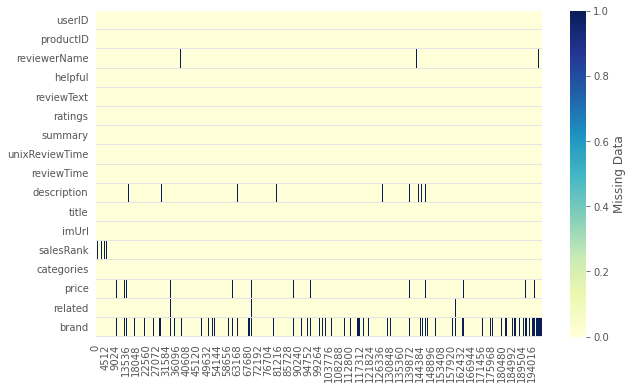

In [ ]:
#Dealing with missing Values for amazon reviews
plt.figure(figsize=(10,6))
sns.heatmap(amazon_reviews.isna().transpose(),
            cmap="YlGnBu",
            cbar_kws={'label': 'Missing Data'})
plt.show()


In [ ]:

#remove missing values for title
print(f"Number of rows missing values in title: {amazon_reviews['title'].isna().sum()}")
amazon_reviews = amazon_reviews.dropna(subset=['title'], how='any', axis=0)
print(f"Number of rows missing values in title after dropping the Na's: {amazon_reviews['title'].isna().sum()}")

#remove missing values for description
print(f"Number of rows missing values in description: {amazon_reviews['description'].isna().sum()}")
amazon_reviews = amazon_reviews.dropna(subset=['description'], how='any', axis=0)
print(f"Number of rows missing values in description after dropping the Na's: {amazon_reviews['description'].isna().sum()}")

#Drop columns
amazon_reviews = amazon_reviews.drop(axis=1, columns='brand')
amazon_reviews = amazon_reviews.drop(axis=1, columns='price')
amazon_reviews = amazon_reviews.drop(axis=1, columns='salesRank')
amazon_reviews = amazon_reviews.drop(axis=1, columns='related')
amazon_reviews = amazon_reviews.drop(axis=1, columns='reviewerName')         
       
amazon_reviews.info()

Number of rows missing values in title: 131
Number of rows missing values in title after dropping the Na's: 0
Number of rows missing values in description: 2633
Number of rows missing values in description after dropping the Na's: 0
<class 'pandas.core.frame.DataFrame'>
Int64Index: 195738 entries, 0 to 198501
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   userID          195738 non-null  object 
 1   productID       195738 non-null  object 
 2   helpful         195738 non-null  object 
 3   reviewText      195738 non-null  object 
 4   ratings         195738 non-null  float64
 5   summary         195738 non-null  object 
 6   unixReviewTime  195738 non-null  int64  
 7   reviewTime      195738 non-null  object 
 8   description     195738 non-null  object 
 9   title           195738 non-null  object 
 10  imUrl           195738 non-null  object 
 11  categories      195738 non-null  object 
dtypes: floa

In [ ]:
#Helper function to convert data types to float

def to_float(x):
    try:
        x = float(x)
    except:
        x = np.nan
    return x

#Helper function to convert NA to 0 and all int to integers.
def convert_int(x):
    try:
        return int(x)
    except:
        return 0
#Helper function to convert NA to "" and all categorical data to string.
def convert_str(x):
    try:
        return str(x)
    except:
        return ['']


### Text transformation and Rename features
This section consists of renaming some features for naming consistency throughout the process. The dataset had asin, reviewId, and overall, respectively renamed to productID, userID and ratings. I have also created helper functions to convert the data types to Int, float, and string. 
 The last part of the cleaning was to deal with the text data. I extracted four text features on my amazon dataset and performed the following operations:
•	Remove digits and words containing digits
•	Remove punctuation
•	Convert text to lower case


In [ ]:

start = time.time()
# copy df and prepocess review_text,title,description column and summary

#temp limit to 10000
amazon_reviews_df = amazon_reviews.copy().iloc[:10000,:]

col1= ['reviewText','categories','description','title']
for c in col1:

    amazon_reviews_df[c] = amazon_reviews_df[c].apply(lambda x: str(x).lower())
    amazon_reviews_df[c] = amazon_reviews_df[c].apply(lambda x: re.sub('\w*\d\w*','', x))
    amazon_reviews_df[c] = amazon_reviews_df[c].apply(lambda x: re.sub('[%s]' % re.escape(string.punctuation), '', x))
    amazon_reviews_df[c] = amazon_reviews_df[c].apply(lambda x: ' '.join([w for w in x.split(' ') if (w not in STOPWORDS)]))

display(amazon_reviews_df[col1])
end = time.time()
print("The code executed in --- %s seconds ---" % (end - start))

,reviewText,categories,description,title
0,oily creamy expected ordered try highlight con...,beauty makeup face concealers neutralizers,extensive range multiple vibrant long wear co...,wawo color professionl makeup eyeshadow camou...
1,palette decent price looking different shades ...,beauty makeup face concealers neutralizers,extensive range multiple vibrant long wear co...,wawo color professionl makeup eyeshadow camou...
2,texture concealer pallet fantastic great cover...,beauty makeup face concealers neutralizers,extensive range multiple vibrant long wear co...,wawo color professionl makeup eyeshadow camou...
3,really cant tell exactly thing powder kind oil...,beauty makeup face concealers neutralizers,extensive range multiple vibrant long wear co...,wawo color professionl makeup eyeshadow camou...
4,little smaller expected okay lasted long time ...,beauty makeup face concealers neutralizers,extensive range multiple vibrant long wear co...,wawo color professionl makeup eyeshadow camou...
...,...,...,...,...
10068,using years fact helps strengthen nails allowi...,beauty skin care hands nails cuticle care cut...,sweep oil across nails youll know nail beauty ...,creative nail design solaroil
10069,nails shellacked artificial nails oil keeps c...,beauty skin care hands nails cuticle care cut...,sweep oil across nails youll know nail beauty ...,creative nail design solaroil
10070,use product regular basis especially winter ke...,beauty skin care hands nails cuticle care cut...,sweep oil across nails youll know nail beauty ...,creative nail design solaroil
10071,dude however use keep hangnails occurring work...,beauty skin care hands nails cuticle care cut...,sweep oil across nails youll know nail beauty ...,creative nail design solaroil


The code executed in --- 1.820664882659912 seconds ---


In [ ]:
amazon_reviews_df['ratings'] = amazon_reviews_df['ratings'].fillna(0)
amazon_reviews_df = amazon_reviews_df.replace(np.nan,'')
for col in amazon_reviews_df.columns :
    amazon_reviews_df[col] = amazon_reviews_df[col].apply(convert_str).astype('str')
amazon_reviews_df['ratings'] = amazon_reviews_df['ratings'].apply(to_float).astype('float')

amazon_reviews_df.info(0)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 0 to 10072
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   userID          10000 non-null  object 
 1   productID       10000 non-null  object 
 2   helpful         10000 non-null  object 
 3   reviewText      10000 non-null  object 
 4   ratings         10000 non-null  float64
 5   summary         10000 non-null  object 
 6   unixReviewTime  10000 non-null  object 
 7   reviewTime      10000 non-null  object 
 8   description     10000 non-null  object 
 9   title           10000 non-null  object 
 10  imUrl           10000 non-null  object 
 11  categories      10000 non-null  object 
dtypes: float64(1), object(11)
memory usage: 1015.6+ KB


## Exploratory Data analysis

In [ ]:
#display the distinct count by rating number
display(amazon_reviews_df["ratings"].value_counts())


5.0    6046
4.0    1651
3.0    1039
1.0     652
2.0     612
Name: ratings, dtype: int64

In [ ]:
import sweetviz
feature_config = sweetviz.FeatureConfig( force_num=["ratings"])
# amazon_reviews_df['ratings'] = amazon_reviews_df['ratings'].apply(to_float).astype('float')
my_report = sweetviz.analyze([amazon_reviews_df,"Train"], "ratings" ,feature_config)


                                             |          | [  0%]   00:00 -> (? left)

In [ ]:
my_report.show_html("finalReport.html")

Report finalReport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


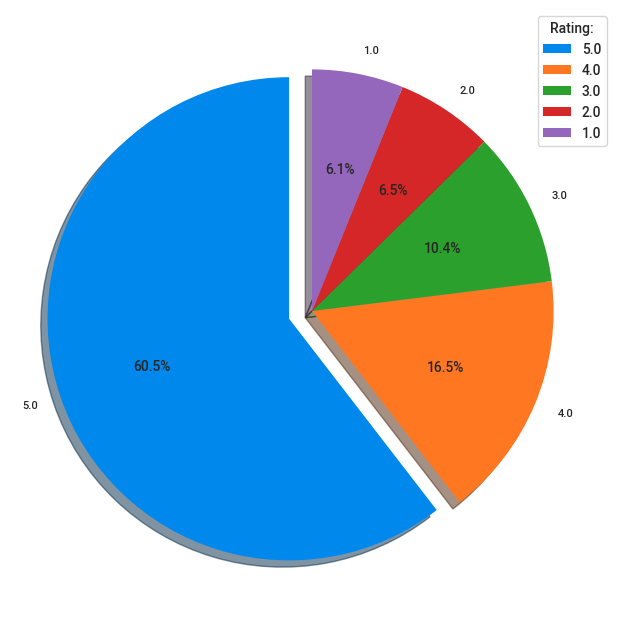

In [ ]:
#Plot the rating distribution using a bar chart
labels = [5.0, 4.0, 3.0, 2.0, 1.0]
values = list(amazon_reviews_df["ratings"].value_counts())
fig = plt.figure(figsize =(8, 8))
explode = (0.1, 0, 0, 0, 0) 
plt.pie(values, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=90)
plt.legend(title = "Rating:")

plt.show()

<Figure size 1000x600 with 0 Axes>

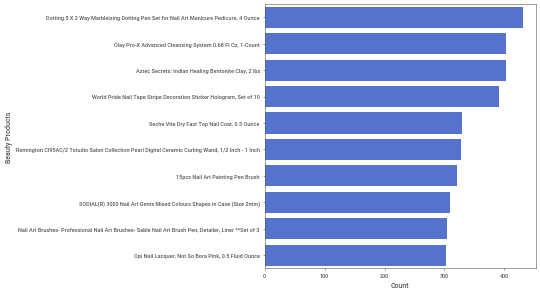

In [ ]:
# Create an index of the 10 highest number products reviewed
Top10ReviewedProducts = list(amazon_reviews['title'].value_counts().index.values[0:10])

#Filter the df to only show the top 10
top10 = amazon_reviews[amazon_reviews['title'].isin(Top10ReviewedProducts)]

#Plot the top 10
plt.figure(figsize=(10,6))
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(7, 7), dpi=50)
chart = sns.countplot(y=top10['title'],data =top10 ,order=Top10ReviewedProducts, color= "royalblue")
plt.ylabel('Beauty Products')
plt.xlabel('Count')
#plt.title('Top 10 Most reviewed products')
plt.show()


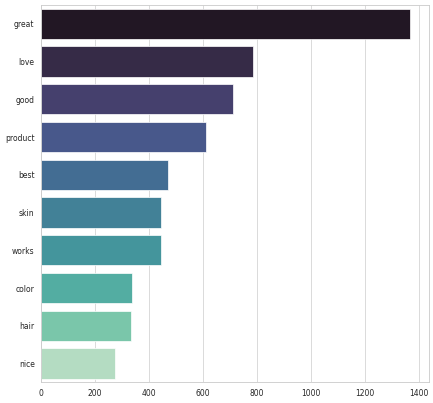

In [ ]:
import collections
col5 = ['reviewText','summary']
corpus=[]
for c in col5:
    corpus = [w for s in amazon_reviews_df[c].str.split().values.tolist() for w in s]
    counter = collections.Counter(corpus)
    most_common_words = counter.most_common(10)

x, y= [], []
for word,count in most_common_words[:50]:
    x.append(word)
    y.append(count)
sns.set(style='whitegrid', color_codes=True)
fig, axis = plt.subplots(ncols=1, nrows=1, figsize=(10, 10), dpi=50)
sns.barplot(x=y,y=x,palette = "mako")
#plt.title('Most common words')
plt.show()



### Lemmetization  of the corpus
 after cleaning the dataset, it is important to perform a lemmetization. It prevents two words to be counted as different if they share the same root. an example is loved and loving have the sae root  word which is love.

In [ ]:
#Lemmatize the dataset

start = time.time()

def lemma_corpus(data):
    lemmatizer=WordNetLemmatizer()
    results=""
    for words in data:
        results+= lemmatizer.lemmatize(words)
    return results

amazon_reviews_df['reviewText']=amazon_reviews_df['reviewText'].apply(lambda x: lemma_corpus(x))
amazon_reviews_df['summary']=amazon_reviews_df['reviewText'].apply(lambda x: lemma_corpus(x))
end = time.time()
print("The code executed in --- %s seconds ---" % (end - start))

The code executed in --- 19.24836802482605 seconds ---


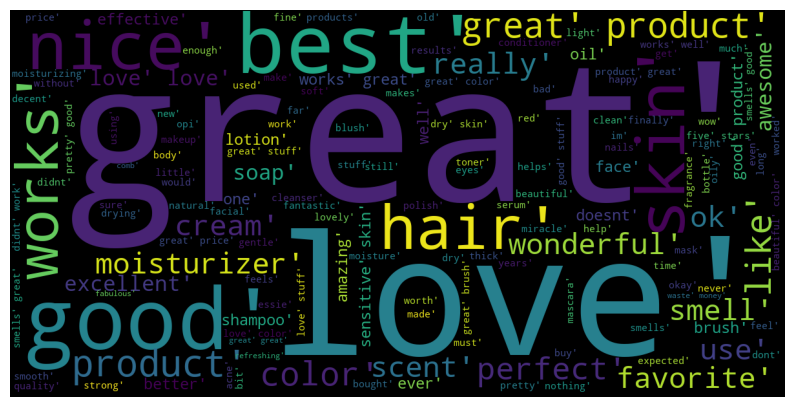

In [ ]:
#Create a word cloud visual
from wordcloud import WordCloud
#word cloud of the most important words in review text
wordcloud = WordCloud(
    background_color='black',
    max_words=150,
    scale=3,
    random_state=1)

wordcloud=wordcloud.generate(str(corpus))
fig = plt.figure(1, figsize=(10, 10))
plt.axis('off')
plt.imshow(wordcloud)
plt.show()



In [ ]:
#identify unique products and users
print('Number of unique products', len(amazon_reviews_df['productID'].unique()))
print('Number of unique users', len(amazon_reviews_df['userID'].unique()))

Number of unique products 545
Number of unique users 7007


# Building a Content based recommender


#### Methodology


Content based-based recommender: This model compares the
reviews and summary of diffrerent prodcuts, and provides
recommendations that have the most similar reviews.


In [ ]:
# Define the dataset for the CBR recommender
amazon_reviews_final_CBR = amazon_reviews_df.copy().iloc[:1000,:]
#amazon_reviews_final_CBR['categories'] = amazon_reviews_final_CBR['categories'].fillna('[]').apply(literal_eval)
#amazon_reviews_final_CBR['categories'] = amazon_reviews_final_CBR['categories'].apply(literal_eval)
#Create a subset to group by product id
amazon_reviews_final_CBR = amazon_reviews_final_CBR.groupby(['productID', 'title'], as_index=False).agg({'ratings':'mean', 
                                                                                     'description':'first',
                                                                                     'reviewText': lambda x: ''.join(str(x.values)),
                                                                                     'categories': lambda x: ''.join(str(x.values))})


# apply literal eval to convert text into  string
amazon_reviews_final_CBR['reviewText'] = amazon_reviews_final_CBR['reviewText'].apply(literal_eval)
amazon_reviews_final_CBR['categories'] = amazon_reviews_final_CBR['categories'].fillna('[]').apply(literal_eval)


display(amazon_reviews_final_CBR.head())
amazon_reviews_final_CBR.shape

,productID,title,ratings,description,reviewText,categories
0,7806397051,wawo color professionl makeup eyeshadow camou...,2.625000,extensive range multiple vibrant long wear co...,[oily creamy expected ordered try highlight co...,[beauty makeup face concealers neutralizersbe...
1,9759091062,xtreme brite brightening gel,3.090909,xtreme brite brightening gel highly concentra...,[nothing stings put used whole tube nothing li...,[beauty hair care styling products creams gels...
2,9788072216,prada candy prada eau de parfum spray oz women,5.000000,prada candy prada eau de parfum spray oz wome...,[havent big fan pradas fragrances years absolu...,[beauty fragrance womens eau de parfumbeauty f...
3,9790790961,versace bright crystal eau de toilette spray w...,4.333333,versace bright crystal perfume women oz eau d...,[im picky comes fragrance love wear dont want ...,[beauty fragrance womens eau de toilettebeauty...
4,9790794231,stella mccartney stella,3.600000,stella women stella mccartney oz edp spray,[like perfume first discovered insert magazine...,[beauty fragrance womens eau de parfumbeauty f...


(54, 6)

In [ ]:
# Function to sanitize data to prevent ambiguity. It removes spaces and converts to lowercase
def sanitize(x):
    if isinstance(x, list):
        #Strip spaces and convert to lowercase
        return [str.lower(i.replace(" ", "")) for i in x]
    else:
        #Check if director exists. If not, return empty string
        if isinstance(x, str):
            return str.lower(x.replace(" ", ""))
        else:
            return ''

In [ ]:

#Create a combo different combo columns
def create_soup(x):
    return ' '.join(x['reviewText']) + ' ' + ' '.join(x['categories']) + ' ' + x['description'] + ' ' + ' '.join(x['title'])
amazon_reviews_final_CBR['soup'] = amazon_reviews_final_CBR.apply(create_soup, axis=1)   
# meta_review.loc[0]['soup']
print(f'The soup for {amazon_reviews_final_CBR["title"][0]} is: \n{amazon_reviews_final_CBR["soup"][0]}')

The soup for wawo  color professionl makeup eyeshadow camouflage facial concealer neutral palette is: 
oily creamy expected ordered try highlight contour looked awful plus took forever arrivepalette decent price looking different shades palette conceals decently however somewhat cake creasetexture concealer pallet fantastic great coverage wide variety uses guess meant professional makeup artists lot colours use use least two regular basis two occasionally reason im giving stars feel like range colors kind waste  product  wonderful cakey gives natural concealed imperfections therefore highly recommend really cant tell exactly thing powder kind oilish pasty fluid far tried twice doesnt really show color facelittle smaller expected okay lasted long time think great coverage price paid heavy wears within  kinda dries skin id recommend people looking cheap coverage beginners learning concealhappy get palette wish offered subscription form like makeup use daily  unnamed set lot blending scul

In [ ]:

#Create a helper function to get part of speech
def get_wordnet_pos(word, pretagged = False):
    """Map POS tag to first character lemmatize() accepts"""
    if pretagged:
        tag = word[1].upper() 
    else:
        tag = nltk.pos_tag([word])[0][1][0].upper()
    
    tag_dict = {"J": wn.ADJ,
                "N": wn.NOUN,
                "V": wn.VERB,
                "R": wn.ADV}

    return tag_dict.get(tag, wn.NOUN)

#create a tokenizer that uses lemmatization (word shortening)
class LemmaTokenizer(object):
    def __init__(self):
        self.wnl = WordNetLemmatizer()
    def __call__(self, articles):
        
        #get the sentences
        sents = sent_tokenize(articles)
        #get the parts of speech for sentence tokens
        sent_pos = [nltk.pos_tag(word_tokenize(s)) for s in sents]
        #flatten the list
        pos = [item for sublist in sent_pos for item in sublist]
        #lemmatize based on POS (otherwise, all words are nouns)
        lems = [self.wnl.lemmatize(t[0], get_wordnet_pos(t, True)) for t in pos if t[0] not in string.punctuation]
        #clean up in-word punctuation
        lems_clean = [''.join(c for c in s if c not in string.punctuation) for s in lems]
        return lems_clean 


    
#lemmatize the stop words
lemmatizer = WordNetLemmatizer()
lemmatized_stop_words = [lemmatizer.lemmatize(w) for w in text.ENGLISH_STOP_WORDS]
#extend the stop words with any other words you want to add, these are bits of contractions
lemmatized_stop_words.extend(['ve','nt','ca','wo','ll'])


In [ ]:

#Define a TF-IDF Vectorizer Object. Remove all english stopwords

tfidf = TfidfVectorizer(tokenizer=LemmaTokenizer(), lowercase=True, stop_words=lemmatized_stop_words,max_features = 100)

#Replace NaN with an empty string
amazon_reviews_final_CBR['soup'] = amazon_reviews_final_CBR['soup'].fillna('')

#Construct the required TF-IDF matrix by applying the fit_transform method on the review text feature
tfidf_matrix = tfidf.fit_transform(amazon_reviews_final_CBR['soup'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

##this extracts the product ids 
corpus_index = amazon_reviews_final_CBR['title']
pd.DataFrame(tfidf_matrix.todense(),index=corpus_index, columns=tfidf.get_feature_names())


,acne,apply,area,bath,best,better,bit,body,bottle,bought,...,tried,try,use,used,using,wash,way,week,work,year
title,,,,,,,,,,,,,,,,,,,,,
wawo color professionl makeup eyeshadow camouflage facial concealer neutral palette,0.052579,0.000000,0.047219,0.000000,0.043539,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.041859,0.043539,0.189714,0.000000,0.035299,0.000000,0.000000,0.000000,0.068041,0.035299
xtreme brite brightening gel,0.073183,0.000000,0.032861,0.000000,0.000000,0.000000,0.092733,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.044009,0.045646,0.049131,0.000000,0.000000,0.092733,0.047351,0.000000
prada candy prada eau de parfum spray oz women,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.134024,0.128699,0.067012,...,0.000000,0.000000,0.000000,0.047512,0.000000,0.000000,0.063078,0.000000,0.000000,0.051139
versace bright crystal eau de toilette spray women ounce,0.000000,0.000000,0.000000,0.000000,0.047410,0.000000,0.000000,0.050367,0.241828,0.050367,...,0.045580,0.094820,0.068860,0.000000,0.038437,0.000000,0.000000,0.000000,0.000000,0.000000
stella mccartney stella,0.000000,0.000000,0.000000,0.000000,0.099398,0.000000,0.000000,0.000000,0.050701,0.000000,...,0.000000,0.000000,0.000000,0.299478,0.000000,0.000000,0.049699,0.000000,0.000000,0.000000
avalon biotin bcomplex thickening conditioner ounce,0.000000,0.007431,0.000000,0.011415,0.000000,0.032752,0.030687,0.012783,0.024549,0.006391,...,0.011568,0.012032,0.078641,0.022657,0.068283,0.018412,0.018048,0.049098,0.023504,0.009755
better living classic two chamber dispenser white,0.000000,0.000000,0.009683,0.796249,0.000000,0.040506,0.018217,0.237133,0.255035,0.028456,...,0.000000,0.017857,0.064840,0.026901,0.014477,0.045542,0.062499,0.009108,0.041858,0.014477
better living ultimate dispenser,0.000000,0.044029,0.000000,0.811633,0.000000,0.000000,0.036364,0.227212,0.218183,0.000000,...,0.000000,0.000000,0.051772,0.053698,0.057798,0.036364,0.035645,0.000000,0.027852,0.028899
crabtree amp evelyn gardeners hand therapy oz,0.000000,0.000000,0.015184,0.000000,0.000000,0.000000,0.000000,0.000000,0.014283,0.014874,...,0.000000,0.000000,0.000000,0.000000,0.011351,0.014283,0.056004,0.000000,0.021880,0.022702


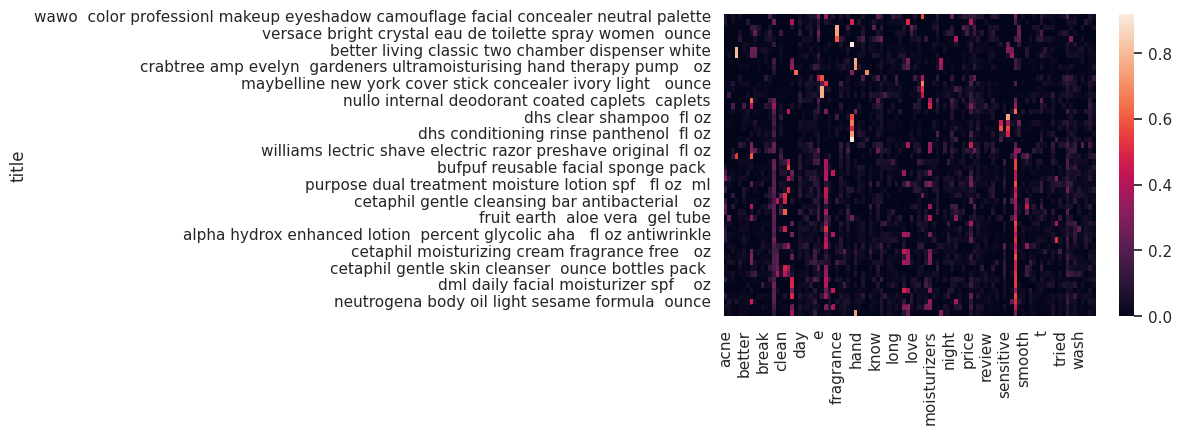

In [ ]:
#heatmap to identify product similarity

feature_names = feature_names = tfidf.get_feature_names()
ax = sns.heatmap(pd.DataFrame(tfidf_matrix.todense(), index=amazon_reviews_final_CBR['title'], columns=feature_names))

In [ ]:


# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)
from sklearn.metrics.pairwise import cosine_similarity  # any other can be used



#### Content recommender function
The final step is to create a recommender function that will take a dataframe, the product id, the column's name, and a number. I will perform the following step to create the process:
•	Pass in a string argument to identify the seed column, which is the column used to recommend other items and get the indices mapping inside the function. <br>
•	Assign a value to return the number of results to return. <br>
•	Obtain the index which the product id.<br>
•	Get the list of cosine similarity scores for that product id.<br>
•	Sort the list based on the cosine similarity score and get the top k list, an argument passed in the function.<br>
•	Finally, return the top items corresponding to the indices.<br>


In [ ]:
def content_recommender(df, seed, seedCol, sim_matrix,  topN=2): 
    #get the indices based off the seedCol
    indices = pd.Series(df.index, index=df[seedCol]).drop_duplicates()
    
    # Obtain the index of the item that matches our seed
    idx = indices[seed]
    
    # Get the pairwsie similarity scores of all items and convert to tuples
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    #delete the item that was passed in
    del sim_scores[idx]
    
    # Sort the items based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top-n most similar items.
    sim_scores = sim_scores[:topN]
    
    # Get the item indices
    product_indices = [i[0] for i in sim_scores]
    
    # Return the topN most similar items
    return df.iloc[product_indices]

In [ ]:
amazon_reviews_final_CBR[amazon_reviews_final_CBR['productID'] == '7806397051']

,productID,title,ratings,description,reviewText,categories,soup
0,7806397051,wawo color professionl makeup eyeshadow camou...,2.625,extensive range multiple vibrant long wear co...,[oily creamy expected ordered try highlight co...,[beauty makeup face concealers neutralizersbe...,oily creamy expected ordered try highlight con...


In [ ]:
content_results = content_recommender(amazon_reviews_final_CBR, '7806397051', 'productID', cosine_sim, 3)
content_results

,productID,title,ratings,description,reviewText,categories,soup
12,B000052WYD,maybelline new york cover stick concealer ivor...,3.68,completely conceals blemishes dark circles imp...,[bought product local drug store disappointmen...,[beauty makeup face concealers neutralizersbe...,bought product local drug store disappointment...
32,B000052YKS,basis cleaner clean face wash fluid ounces,4.00,deep cleans refreshes oilfree soapfree gel g...,[good every day facial scrub doesnt seem cause...,[beauty skin care face cleansers washesbeauty ...,good every day facial scrub doesnt seem cause ...
11,B000052WY7,maybelline new york expert wear brow amp eyeli...,4.00,defining brow filler precision eye liner built...,[theres way sharpening though packaged encase...,[beauty makeup eyes eyelinerbeauty makeup eyes...,theres way sharpening though packaged encased...


# Creating a Collaborative Filetring 

#### Overview
Collaborative filtering is a popular recommender system widely used in the online business industry. The general idea is to recommend products to users based on their interests. For this purpose, I created a collaborative filtering model. Our research focused on implementing K-Nearest Neighbor (KNN) and singular value decomposition models to predict the expected ratings. The Root Mean Squared Error (RMSE) is used to show the performance of our regressors. It represents the root squared sum of the actual and predicted value difference. The first step is to split our rating dataset containing only three columns (user id, product id, and ratings) into 80% training and 20% testing sets. The target variable is the rating, and the rest of the dataframe consists of the independent variables. 	The surprise package provides all the required algorithms selected. SurPrise stands for Simple Python Recommender System Engine. It is easy to use and has already integrated most of the algorithms used for a recommender system. 



#### User-based filtering

In [ ]:
# copy df
ratings = amazon_reviews.copy().iloc[:5000,:]

ratings_cf=ratings[['userID','productID','ratings']]
#convert col to string
col6 = ['userID','productID']

#generate some stats using describe
display(round(ratings_cf.describe(),2))
ratings_cf.isna().sum()


,ratings
count,5000.00
mean,4.15
std,1.24
min,1.00
25%,4.00
50%,5.00
75%,5.00
max,5.00


userID       0
productID    0
ratings      0
dtype: int64

In [ ]:

#Assign X as the original ratings dataframe and y as the user_id column of ratings.
X = ratings_cf.copy()
y = ratings_cf['userID']

#Split into training and test datasets, stratified along user_id
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)

print(f'Training Set has {X_train.shape[0]} rows')
print(f'Test Set has {X_test.shape[0]} rows')

Training Set has 4000 rows
Test Set has 1000 rows


In [ ]:
#Define a Reader object
#The Reader object helps in parsing the file or dataframe containing ratings
reader = Reader(rating_scale=(1,5))

#Create the dataset to be used for building the filter
#data = Dataset.load_from_df(ratings, reader)
data = Dataset.load_from_df(ratings_cf, reader)

#Define the algorithm object; in this case kNN
random.seed(123)
np.random.seed(123)
knn = KNNBasic(k=5, verbose=False)

#Evaluate the performance in terms of RMSE
from surprise.model_selection import cross_validate
knn_cv = cross_validate(knn, data, measures=['RMSE'], cv=5, verbose=True)
#to extract the mean RMSE, we need to get the mean of the test_rmse values
knn_RMSE = np.mean(knn_cv['test_rmse'])
print(f'\nThe RMSE across five folds was {knn_RMSE}')

Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.2036  1.3076  1.2455  1.2673  1.3105  1.2669  0.0400  
Fit time          0.23    0.23    0.24    0.22    0.22    0.23    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    

The RMSE across five folds was 1.26692094636221


In [ ]:
#### Item based filtering
#Define a Reader object
#The Reader object helps in parsing the file or dataframe containing ratings
seed = 123
reader = Reader(rating_scale=(1,5))

#Create the dataset to be used for building the filter
#data = Dataset.load_from_df(ratings, reader)
data = Dataset.load_from_df(ratings_cf, reader)


sim_options = {'user_based': False  # compute  similarities between items
               }

#Define the algorithm object; in this case kNN
random.seed(seed)
np.random.seed(seed)
knn = KNNBasic(k=5, sim_options=sim_options)

#Evaluate the performance in terms of RMSE
from surprise.model_selection import cross_validate
knn_cv = cross_validate(knn, data, measures=['RMSE'], cv=5, verbose=True)
#to extract the mean RMSE, we need to get the mean of the test_rmse values
knn_RMSE = np.mean(knn_cv['test_rmse'])
print(f'\nThe RMSE across five folds was {knn_RMSE}')

#re-train on the whole dataset
trainset = data.build_full_trainset()
knn.fit(trainset)


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Evaluating RMSE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1701  1.2946  1.2380  1.2534  1.2997  1.2511  0.0469  
Fit time          0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    

The RMSE across five folds was 1.2511479428945254
Computing the msd similarity matrix...
Done computing similarity matrix.


In [ ]:
#data = Dataset.load_from_df(ratings, reader)
seed = 123
data = Dataset.load_from_df(ratings_cf, reader)
#Define the SVD algorithm object
np.random.seed(seed)
#Define the SVD algorithm object
svd = SVD()
## apply the seeds right before cross validating, use both random and np.random
random.seed(seed)
np.random.seed(seed)
#Evaluate the performance in terms of RMSE
svd_cv = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)
#to extract the mean RMSE, we need to get the mean of the test_rmse values
svd_RMSE = np.mean(svd_cv['test_rmse'])
print(f'\nThe RMSE across five folds was {svd_RMSE}')

#train on the whole dataset
trainset = data.build_full_trainset()
svd.fit(trainset)

Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1636  1.2494  1.1928  1.2028  1.2576  1.2132  0.0354  
Fit time          0.20    0.20    0.20    0.20    0.20    0.20    0.00    
Test time         0.01    0.00    0.00    0.01    0.00    0.00    0.00    

The RMSE across five folds was 1.213241069332445


In [ ]:
#Hyper parameter tuning using grid search

#Define a Reader object
#The Reader object helps in parsing the file or dataframe containing ratings
reader = Reader(rating_scale=(1,5)) # defaults to (0,5)


#Create the dataset to be used for building the filter
data = Dataset.load_from_df(ratings_cf, reader)

#get the raw ratings
raw_ratings = data.raw_ratings

# shuffle ratings - 
random.seed(seed)
np.random.seed(seed)
random.shuffle(raw_ratings)

#A = 90% of the data, B = 10% of the data
threshold = int(.9 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

data.raw_ratings = A_raw_ratings  # data is now the set A

# Select your best algo with grid search.
print('Grid Search...')
param_grid = {'k':[5,10,20],
             'min_k':[5,6,7,8],
             'sim_options':{'name':['msd','cosine','pearson'],
                           'min_surpport':[0,3,5],
                           'user_based':[False]}
             }

grid_search = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5)
grid_search.fit(data)

knn_gs_algo = grid_search.best_estimator['rmse']



# # retrain on the whole set A
trainset = data.build_full_trainset()
knn_gs_algo.fit(trainset)

# Compute biased accuracy on A 
predictions = knn_gs_algo.test(trainset.build_testset())
print(f'Biased accuracy on A = {accuracy.rmse(predictions)}')


# Compute unbiased accuracy on B
testset = data.construct_testset(B_raw_ratings)  # testset is now the set B
predictions = knn_gs_algo.test(testset)
print(f'Unbiased accuracy on B = {accuracy.rmse(predictions)}')




Grid Search...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix.

In [ ]:
#Add your code here
seed = 123

#The Reader object helps in parsing the file or dataframe containing ratings
reader = Reader(rating_scale=(1,5)) # defaults to (0,5)

#Create the dataset to be used for building the filter
data = Dataset.load_from_df(ratings_cf, reader)

#get the raw ratings
raw_ratings = data.raw_ratings

#Define the SVD algorithm object
svd = SVD()
## apply the seeds right before cross validating, use both random and np.random
random.seed(seed)
np.random.seed(seed)
#Evaluate the performance in terms of RMSE
svd_cv = cross_validate(svd, data, measures=['RMSE'], cv=5, verbose=True)
#to extract the mean RMSE, we need to get the mean of the test_rmse values
svd_RMSE = np.mean(svd_cv['test_rmse'])
print(f'\nThe RMSE across five folds was {svd_RMSE}')

#train on the whole dataset
trainset = data.build_full_trainset()
svd.fit(trainset)


#### Hyperparameter Tuning for SVD algo 

# shuffle ratings - set the seed here for homework
random.seed(seed)
np.random.seed(seed)
random.shuffle(raw_ratings)

#A = 90% of the data, B = 10% of the data
threshold = int(.90 * len(raw_ratings))
A_raw_ratings = raw_ratings[:threshold]
B_raw_ratings = raw_ratings[threshold:]

data.raw_ratings = A_raw_ratings  # data is now the set A

# Select your best algo with grid search.
print('Grid Search...')
param_grid = {'n_epochs': [15, 20, 25], 'lr_all': [.005, .025, .001],'reg_all': [.01, .02, .05]}
grid_search = GridSearchCV(SVD, param_grid, measures=['rmse'], cv=5)
grid_search.fit(data)

svd_algo = grid_search.best_estimator['rmse']


# retrain on the whole set A
trainset = data.build_full_trainset()
svd_algo.fit(trainset)





Evaluating RMSE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.1636  1.2494  1.1928  1.2028  1.2576  1.2132  0.0354  
Fit time          0.21    0.21    0.21    0.21    0.20    0.21    0.01    
Test time         0.01    0.01    0.01    0.01    0.00    0.01    0.00    

The RMSE across five folds was 1.213241069332445
Grid Search...


In [ ]:
#let's predict the rating of top 5 users for top 5 product
rat =ratings_cf[0:5]
print(rat)
knn_gs_algo.predict("A3G6XNM240RMWA", "7806397051")
svd.predict("A3G6XNM240RMWA", "7806397051")



           userID   productID  ratings
0  A1YJEY40YUW4SE  7806397051      1.0
1   A60XNB876KYML  7806397051      3.0
2  A3G6XNM240RMWA  7806397051      4.0
3  A1PQFP6SAJ6D80  7806397051      2.0
4  A38FVHZTNQ271F  7806397051      3.0


Prediction(uid='A3G6XNM240RMWA', iid='7806397051', r_ui=None, est=3.4135668583481786, details={'was_impossible': False})

In [ ]:
## apply the seeds right predicting, use both random and np.random
random.seed(seed)
np.random.seed(seed)
#run some predictions
pred_df = ratings_cf.copy() #make a copy of the ratings that we can add columns to

#get all the predictions (this could be computationally expensive and would probably only be computed occasionally)
pred_df['prediction'] = pred_df.apply(lambda x: svd.predict(x['userID'], x['productID']).est, axis=1) 

pred_df

,userID,productID,ratings,prediction
0,A1YJEY40YUW4SE,7806397051,1.0,2.672923
1,A60XNB876KYML,7806397051,3.0,3.401673
2,A3G6XNM240RMWA,7806397051,4.0,3.413567
3,A1PQFP6SAJ6D80,7806397051,2.0,2.955590
4,A38FVHZTNQ271F,7806397051,3.0,3.053731
...,...,...,...,...
5015,A33W4M1SMV6NDK,B00013YYS0,5.0,4.725223
5016,AIIR8E34EDKCQ,B00013YYS0,5.0,4.963580
5017,A2QRUJQ4V9VD9C,B00013YYS0,5.0,4.629141
5018,A19WX5I4TGF8R8,B00013YYS0,3.0,4.078467


In [ ]:

output = []
seed = 123
## apply the seeds right before cross validating, use both random and np.random
random.seed(seed)
np.random.seed(seed)
for algorithm in [ KNNBaseline(), KNNBasic(),  BaselineOnly(), SVD()]:
    # Perform cross validation
    results = cross_validate(algorithm, data, measures=['RMSE'], cv=5, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algorithm).split(' ')[0].split('.')[-1]], index=['Algorithm']))
    output.append(tmp)
    
pd.DataFrame(output).set_index('Algorithm').sort_values('test_rmse') 

Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Estimating biases using als...
Estimating biases using als...
Estimating biases usin

,test_rmse,fit_time,test_time
Algorithm,,,
BaselineOnly,1.214543,0.010666,0.003853
SVD,1.217782,0.178045,0.004696
KNNBaseline,1.237103,0.200806,0.012933
KNNBasic,1.267816,0.191416,0.180383


# Creating a Hybrid model( content and collaborative Filetring based recommender

#### Overview
for this section a User-based filtering 
The main idea behind user-based filtering is that if we are able to find users that
have bought and liked similar items in the past, they are more likely to buy
similar items in the future too. Therefore, these models recommend items to a
user that similar users have also liked. Amazon's Customers who bought this

#### Results

#### Limitations

In [ ]:
ratings_hybrid = ratings_cf.copy()
meta_review = amazon_reviews_final_CBR.copy()


In [ ]:
def fetchSimilarityMatrix(df, soupCol, vectorizer, vectorType='Tfidf'):
    '''
    Parameters
    df: the dataframe containing a soup column to tranform
    soupCol: The string title of the soup column
    vectorizer: an initialized vectorizer, with all pre-processing you desire
    vectorType: 'Tfidf' or 'Count' - representing the type of vectorizer you used.

    Returns
    Sparse Similarity Matrix
    '''

    # make sure the soup has no NaN
    df[soupCol] = df[soupCol].fillna('')
    nmatrix = vectorizer.fit_transform(df[soupCol])

    #apply the appropriate vectorizer
    if(vectorType=='Tfidf'):
        print('Using Linear Kernel (Tfidf)')
        sim =linear_kernel(nmatrix, nmatrix)
    else:
        print('Using Cosine_similarity')
        sim = cosine_similarity(nmatrix, nmatrix)
    return(sim)

def content_recommender(df, seed, seedCol, sim_matrix,  topN=5): 
    #get the indices based off the seedCol
    indices = pd.Series(df.index, index=df[seedCol]).drop_duplicates()
    
    # Obtain the index of the item that matches our seed
    idx = indices[seed]
    
    # Get the pairwsie similarity scores of all items and convert to tuples
    sim_scores = list(enumerate(sim_matrix[idx]))
    
    #delete the item that was passed in
    del sim_scores[idx]
    
    # Sort the items based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Get the scores of the top-n most similar items.
    sim_scores = sim_scores[:topN]
    
    # Get the item indices
    item_indices = [i[0] for i in sim_scores]
    
    snip = df.iloc[item_indices].copy()
    snip['sim_score'] = [i[1] for i in sim_scores]
    
    # Return the topN most similar items
    return snip


In [ ]:

def hybrid(user,contentRecs, predCol,algorithm,minRating, N):

    #generated predicted ratings
    contentRecs['est_rating'] = contentRecs.apply(lambda x:  algorithm.predict(user, x[predCol]).est  , axis=1)
    #sort the results
    contentRecs = contentRecs.sort_values('est_rating', ascending=False)

    #return the finalN number of results
    #contentRecs = contentRecs[contentRecs['est_rating'] >= minRating]
    return contentRecs[contentRecs['est_rating'] >= minRating].head(N)





In [ ]:
#fetch our similarity matrix
sim = fetchSimilarityMatrix(meta_review, 'soup', tfidf, 'Tfidf')
sim[0,2]

# save output 
results = content_recommender(meta_review, '7806397051', 'productID', sim, 25)

results

# results = content_recommender(meta_review, '7806397051', 'productID', cosine_sim, 25)
#content_recommender(amazon_reviews_final_CBR, '7806397051', 'productID', cosine_sim, 3)


Using Linear Kernel (Tfidf)


,productID,title,ratings,description,reviewText,categories,soup,sim_score
12,B000052WYD,maybelline new york cover stick concealer ivor...,3.680000,completely conceals blemishes dark circles imp...,[bought product local drug store disappointmen...,[beauty makeup face concealers neutralizersbe...,bought product local drug store disappointment...,0.801236
32,B000052YKS,basis cleaner clean face wash fluid ounces,4.000000,deep cleans refreshes oilfree soapfree gel g...,[good every day facial scrub doesnt seem cause...,[beauty skin care face cleansers washesbeauty ...,good every day facial scrub doesnt seem cause ...,0.599931
11,B000052WY7,maybelline new york expert wear brow amp eyeli...,4.000000,defining brow filler precision eye liner built...,[theres way sharpening though packaged encase...,[beauty makeup eyes eyelinerbeauty makeup eyes...,theres way sharpening though packaged encased...,0.583850
26,B000052YJD,bufpuf reusable facial sponge extra gentle ea,3.428571,one facial spongefor daily cleansing sensitive...,[purchased researching would best helpprevent ...,[beauty skin care face cleansersbeauty skin ca...,purchased researching would best helpprevent f...,0.560923
47,B000052YMX,complex therapeutic moisturizing face cream ...,3.750000,dermatologist recommended contains phospholip...,[wow stuff garbage perplexed great reviews fai...,[beauty skin care face creams moisturizersbea...,wow stuff garbage perplexed great reviews fair...,0.532778
31,B000052YKM,stridex medicated pads maximum strength count ...,4.900000,super size pads clean dirt sweat oil stuff clo...,[dont severe acne get older im ill get one tw...,[beauty skin care face cleansersbeauty skin ca...,dont severe acne get older im ill get one two...,0.527834
17,B000052XW5,pretty feet amp hands rough skin removerexfoli...,4.333333,soft sensuous skin waiting uncovered feet hand...,[tested product boyfriends feet get calluses p...,[beauty skin care face cleansersbeauty skin ca...,tested product boyfriends feet get calluses pl...,0.492765
40,B000052YM8,alpha hydrox oil free treatment percent aha ...,4.000000,youre looking concentrated alpha hydroxy acid ...,[great stuff blemishes works clears month twi...,[beauty skin care face treatments masksbeauty...,great stuff blemishes works clears month twic...,0.491077
41,B000052YMG,aquanil cleanser fl oz,4.285714,sensitive skinnoncomedogenichypoallergenicfrag...,[started checking facial cleansers amazon late...,[beauty skin care face cleansersbeauty skin ca...,started checking facial cleansers amazon late ...,0.489661
38,B000052YM4,alpha hydrox foaming face wash fl oz,3.909091,wonderfully sudsy foaming cleanser gently thor...,[leaves face fresh super clean free acne start...,[beauty skin care face cleansers washesbeauty ...,leaves face fresh super clean free acne starte...,0.485440


In [ ]:
#Recommend the top 3 products 
out = hybrid('A60XNB876KYML', results, 'productID', svd, 1,3)
display(out[['title','ratings','sim_score','est_rating']])

,title,ratings,sim_score,est_rating
31,stridex medicated pads maximum strength count ...,4.900000,0.527834,4.549884
27,bufpuf reusable facial sponge pack,4.571429,0.427141,4.539627
46,cetaphil gentle skin cleanser fl oz,4.833333,0.426123,4.533391


In [ ]:
#Summary

In [ ]:
#Recommend the top 3 products 
out = hybrid('A60XNB876KYML', results, 'productID', svd, 1,3)
display(out[['title','ratings','sim_score','est_rating']])
def merge_results (df,df2,col,):
    merge_df = pd.merge(df[['productID','ratings']],meta_beauty, on = 'productID')  
    merge_df = merge_df [['title','imUrl']]
    merge_df.columns = ['Product Name', 'Image']
    return merge_df
#merge_results(out,meta_beauty, 'productID')


,title,ratings,sim_score,est_rating
31,stridex medicated pads maximum strength count ...,4.900000,0.527834,4.549884
27,bufpuf reusable facial sponge pack,4.571429,0.427141,4.539627
46,cetaphil gentle skin cleanser fl oz,4.833333,0.426123,4.533391


In [ ]:
hybrid_res = merge_results(out,meta_beauty, 'productID')
content_res = merge_results(content_results,meta_beauty,'productID')

# Converting links to html tags
def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'
def renderImage(df):
# Rendering the dataframe as HTML table
    #df.to_html(escape=False, formatters=dict(Image=path_to_image_html))
   
    #  Saving the dataframe as a webpage
    df.to_html('test.html',escape=False, formatters=dict(Image=path_to_image_html))
    # # Rendering the images in the dataframe using the HTML method.
    return display(HTML(df.to_html(escape=False,formatters=dict(Image=path_to_image_html))))

# # Saving the dataframe as a webpage
# merge_df.to_html('webpage.html',escape=False, formatters=dict(imUrl=path_to_image_html))
#pred_df


In [ ]:
from IPython.display import Image

product_exple = meta_beauty[meta_beauty['productID']=='7806397051']
product_exple = product_exple[['title','imUrl']]
product_exple=product_exple.rename({'title':'Product Name','imUrl':'Image'}, axis = 1)
product_exple

,Product Name,Image
115,WAWO 15 Color Professionl Makeup Eyeshadow Cam...,http://ecx.images-amazon.com/images/I/41Rn18Oe...


In [ ]:

#Hybrid recommender system results
display(renderImage(product_exple))
print("For the product above we recommend the top 3 products")
display(renderImage(content_res))

,Product Name,Image
115,WAWO 15 Color Professionl Makeup Eyeshadow Camouflage Facial Concealer Neutral Palette,


None

For the product above we recommend the top 3 products


,Product Name,Image
0,"Maybelline New York Cover Stick Concealer, Ivory, Light 2, 0.16 Ounce",
1,"Basis Cleaner Clean Face Wash, 6 Fluid Ounces",
2,"Maybelline New York Expert Wear Brow & Eyeliner, 151 Velvet Black , .011 oz (310 mg)",


None

In [ ]:
#Hybrid recommender system results
display(renderImage(product_exple))
print("For the product above we recommend the top 3 products")
display(renderImage(hybrid_res))

,Product Name,Image
115,WAWO 15 Color Professionl Makeup Eyeshadow Camouflage Facial Concealer Neutral Palette,


None

For the product above we recommend the top 3 products


,Product Name,Image
0,"Stri-Dex Medicated Pads, Maximum Strength, 90-Count Containers, (Pack of 3)",
1,Buf-Puf Reusable Facial Sponge (Pack of 6),
2,Cetaphil Gentle Skin Cleanser - 16 fl oz,


None

We have selected this product as example


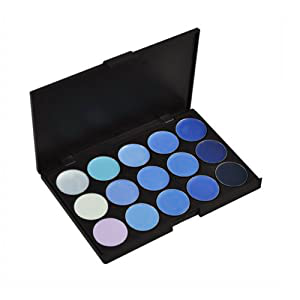



Based on the product selected above,we would recommned these similar products


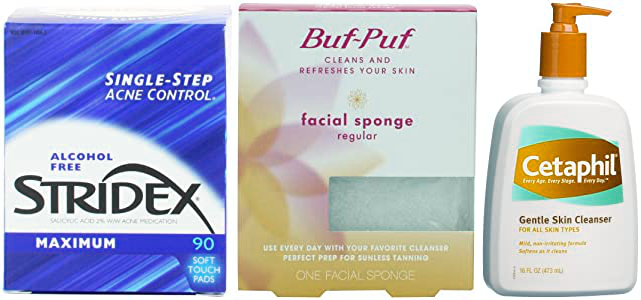

In [ ]:
from numpy.ma.core import prod

import cv2 as cv 
from google.colab.patches import cv2_imshow # for image display
from skimage import io
from PIL import Image 

urls = product_exple["Image"]
for url in urls:

  image = io.imread(url) 


  image = io.imread(url) 
  #image_2 = cv.cvtColor(io.imread(url[0]) , cv.COLOR_BGR2RGB)
#final_frame = cv.hconcat((image, image2,image3))
print('We have selected this product as example')
cv2_imshow(image)
print('\n')

url1 = hybrid_res["Image"][0]
url2 = hybrid_res["Image"][1]
url3 = hybrid_res["Image"][2]
urls =[url1,url2,url3]
for idx, url in enumerate(urls):
  if idx == 0:
    image = io.imread(url) 
  elif idx ==1:
    image2 = io.imread(url) 
  else:
    image3 = io.imread(url) 
    idx += 1
  # image = io.imread(url) 
  #image_2 = cv.cvtColor(io.imread(url[0]) , cv.COLOR_BGR2RGB)
final_frame = cv.hconcat((image, image2,image3))
print('Based on the product selected above,we would recommned these similar products')
cv2_imshow(final_frame)
print('\n')

Based on the product selected above,we would recommned these similar products


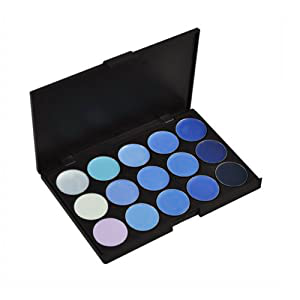

In [ ]:


urls = product_exple["Image"]
for url in urls:

  image = io.imread(url) 


  image = io.imread(url) 
  #image_2 = cv.cvtColor(io.imread(url[0]) , cv.COLOR_BGR2RGB)
#final_frame = cv.hconcat((image, image2,image3))
print('We have selected this product as example')
cv2_imshow(image)
print('\n')